In [1]:
import cProfile,pstats

In [2]:
import numpy as np
# import pyximport; pyximport.install(setup_args={
#                               "include_dirs":np.get_include()},
#                   reload_support=True)

from helper_methods_cy import *
from simulation_up_cy import *

from scipy.optimize import brentq
import math
# from simulation_up_cy import *

In [14]:
sim = Simulation(1, sweeps= 10000) 
# file_name = '../'+'elongation-rates/'+'YAL017W_rates.dat'
file_name = '../'+'kvalue_dummy.dat'
sim.ExtractRates(file_name,0.1,1.4)

In [4]:
%%timeit
sim.Reach_steady()
sim.Run_Sim()

1 loop, best of 3: 6.68 s per loop


In [3]:
%%timeit
sim.Reach_steady()
sim.Run_Sim()

1 loop, best of 3: 6.53 s per loop


In [3]:
%%timeit
sim.Reach_steady()
sim.Run_Sim()

1 loop, best of 3: 6.46 s per loop


In [10]:
sim = Simulation(1, sweeps= 10000) 
# file_name = '../'+'elongation-rates/'+'YAL017W_rates.dat'
file_name = '../'+'kvalue_dummy.dat'
sim.ExtractRates(file_name,0.1,0.9)


In [15]:
sim.Reach_steady()
sim.Run_Sim()

In [5]:
import matplotlib.pyplot as plt


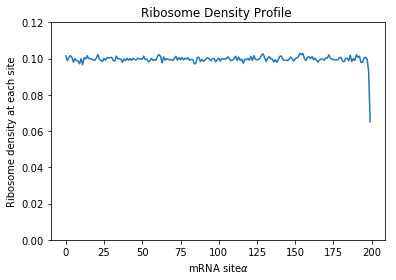

In [16]:
plt.plot(np.arange(0,len(sim.rho_)),sim.rho_)
plt.ylim(0,.12)
plt.xlabel(r"mRNA site$\alpha$")
plt.ylabel("Ribosome density at each site")
plt.title("Ribosome Density Profile ")
plt.show()

In [17]:
sim.rho_

array([0.10149973, 0.09892875, 0.10047404, 0.10163006, 0.10074318,
       0.09801756, 0.10005868, 0.0988483 , 0.09873145, 0.09714507,
       0.09997285, 0.09658696, 0.10056344, 0.09979149, 0.10157894,
       0.09998956, 0.09997776, 0.09976236, 0.09920215, 0.09909806,
       0.1003918 , 0.10228557, 0.09958259, 0.09903672, 0.09841912,
       0.10014104, 0.09912448, 0.10056566, 0.10038357, 0.10050744,
       0.10068666, 0.09893997, 0.09863177, 0.10136713, 0.09990308,
       0.09997249, 0.09961897, 0.09791835, 0.09979899, 0.09883056,
       0.10020944, 0.09904809, 0.10014437, 0.09900227, 0.10021898,
       0.09950992, 0.09923927, 0.10015601, 0.09990227, 0.09974904,
       0.09963662, 0.1013654 , 0.09946203, 0.09971141, 0.09820157,
       0.09870398, 0.10010483, 0.09903783, 0.0994118 , 0.0990929 ,
       0.10145531, 0.10217129, 0.10112105, 0.09765237, 0.1009272 ,
       0.09915047, 0.09991479, 0.09968203, 0.0992589 , 0.09940487,
       0.09903651, 0.10013969, 0.10131349, 0.09909736, 0.10052

In [7]:
cProfile.runctx("sim.Reach_steady()", globals(), locals(), "Profile.prof")

s = pstats.Stats("Profile.prof")
s.print_stats()

Tue Mar 26 14:45:43 2019    Profile.prof

         5109655 function calls in 9.403 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   131019    0.026    0.000    0.026    0.000 {method 'insert' of 'list' objects}
        1    0.000    0.000    9.403    9.403 {built-in method builtins.exec}
   393039    0.075    0.000    0.075    0.000 {built-in method builtins.isinstance}
   786114    0.072    0.000    0.072    0.000 {built-in method builtins.len}
   131019    0.066    0.000    0.066    0.000 {built-in method builtins.sorted}
   262038    0.027    0.000    0.027    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
   393039    0.101    0.000    0.303    0.000 /Users/harshrathee/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:424(asarray)
   262029    0.036    0.000    0.036    0.000 {method 'item' of 'numpy.ndarray' objects}


In [19]:
import numba
from numba import jit
import array

In [22]:
@jit
def test():
    a = array.array('i',[1,2,3,4])
    
    for i in range(2000):
        
        a.insert(1,2)
    

In [23]:
%timeit test()

The slowest run took 261.51 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 562 µs per loop


[5, 1, 2, 3]

In [24]:
%load_ext Cython

In [36]:
# %%cython

def test_2():
    
#     cdef int i 
    for i in range(2000*500):
        pass



In [37]:
%timeit test_2()

10 loops, best of 3: 19.1 ms per loop


TypeError: unsupported operand type(s) for /: 'array.array' and 'int'

ERROR:root:Cell magic `%%cython` not found.


10 loops, best of 3: 62.2 ms per loop
